In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Loading train and test Dataset and Concate them 

In [16]:
df_train = pd.read_csv("../../media/train_data.csv")
df_test = pd.read_csv("../../media/test_data.csv")
df_train.shape,df_test.shape

((54808, 14), (23490, 13))

In [17]:
df_concat = pd.concat([df_train,df_test],axis=0)

In [18]:
df_concat.shape

(78298, 14)

In [19]:
df_concat.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


# EDA Exploratory Data Analysis

In [20]:
df_concat.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [21]:
df_concat.std()

employee_id             22602.830026
no_of_trainings             0.606766
age                         7.665928
previous_year_rating        1.260982
length_of_service           4.248070
KPIs_met >80%               0.478222
awards_won?                 0.150073
avg_training_score         13.383664
is_promoted                 0.279137
dtype: float64

In [22]:
df_concat.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<AxesSubplot: >

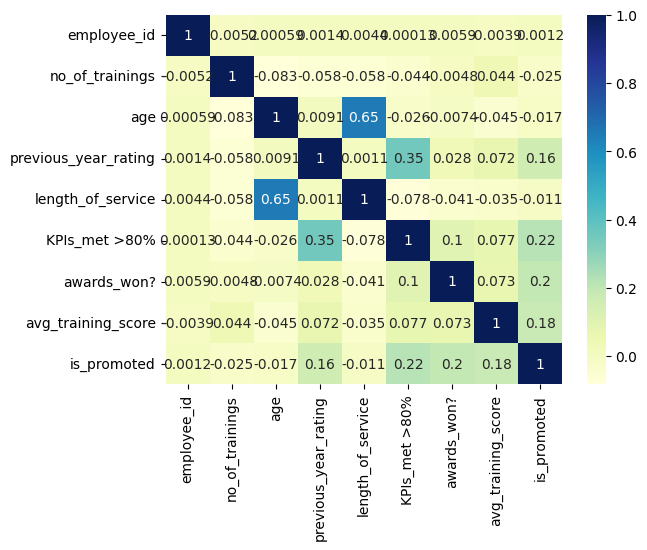

In [23]:
sns.heatmap(df_concat.corr(),annot=True,cmap="YlGnBu")

In [24]:
#Univariate Analysis

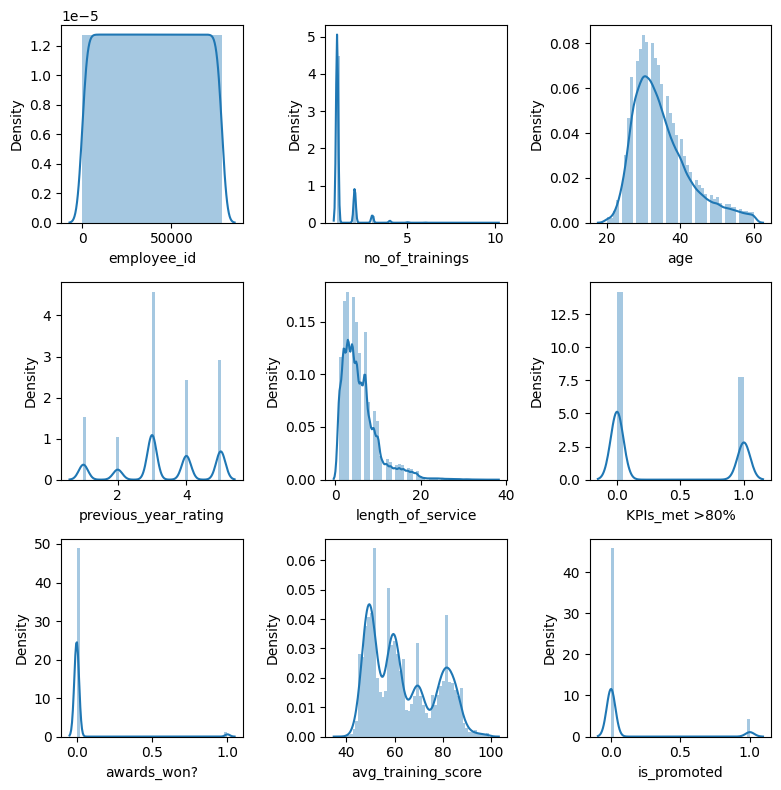

In [25]:
num_col = df_concat.select_dtypes(include=np.number).columns
c=1
plt.figure(figsize=(8,8))
for x in num_col:
    plt.subplot(3,3,c)
    sns.distplot(df_concat[x])
    c+=1
plt.tight_layout()

Checking Skenewss of data

In [26]:
#Ho: Data is normally distributed
#Ha: Data is not normnally distributed
df_concat.skew()

employee_id             2.765143e-19
no_of_trainings         3.403109e+00
age                     1.008714e+00
previous_year_rating   -3.148381e-01
length_of_service       1.728033e+00
KPIs_met >80%           6.104767e-01
awards_won?             6.356378e+00
avg_training_score      4.537268e-01
is_promoted             2.972339e+00
dtype: float64

In [27]:
# we can see data is skewed 

ValueError: could not convert string to float: 'Sales & Marketing'

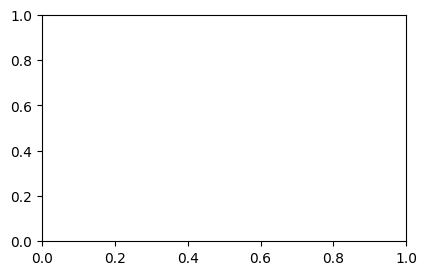

In [28]:
cat_col = df_concat.select_dtypes(include=object).columns
c=1
plt.figure(figsize=(16,10))
for x in cat_col:
    plt.subplot(3,3,c)
    sns.countplot(df_concat[x])
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()

In [ ]:
#Sales&Marketing,Operations,procruitment are top 3 departments with more number of employyes
# Employees are highest in region_2
# Male peoples are more in the company


In [ ]:
df_concat["department"].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [ ]:
df_concat["region"].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [ ]:
df_concat["education"].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [ ]:
df_concat[["gender"]].value_counts()

gender
m         55092
f         23206
dtype: int64

In [ ]:
df_concat[["recruitment_channel"]].value_counts()

recruitment_channel
other                  43524
sourcing               33181
referred                1593
dtype: int64

Bivariate Analysis

In [ ]:
df_concat.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
#bivarient analysis
pd.crosstab(df_concat["department"],df_concat["is_promoted"])

is_promoted,0.0,1.0
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


<AxesSubplot:xlabel='department'>

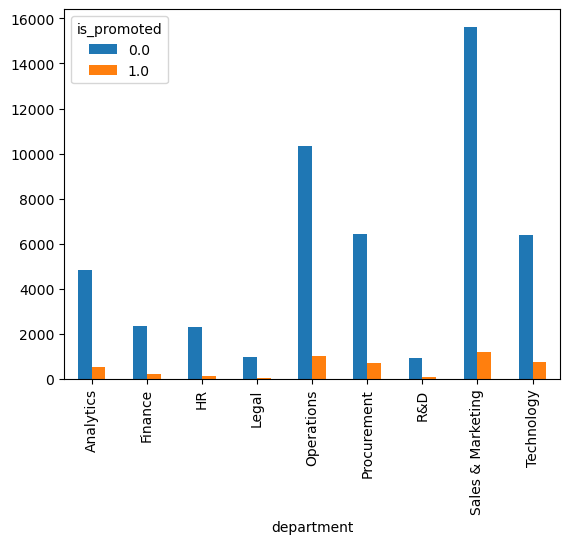

In [ ]:
pd.crosstab(df_concat["department"],df_concat["is_promoted"]).plot(kind="bar")

In [ ]:
for x in df_concat["department"].unique():
    print("Percentage of people promoted in the departmnet ",x," ",(len(df_concat.loc[(df_concat.department==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted in the departmnet  Sales & Marketing   1.5492094306367978
Percentage of people promoted in the departmnet  Operations   1.3065467828041584
Percentage of people promoted in the departmnet  Technology   0.9808679659761425
Percentage of people promoted in the departmnet  Analytics   0.6539119773174282
Percentage of people promoted in the departmnet  R&D   0.08812485631816905
Percentage of people promoted in the departmnet  Procurement   0.8786942195202943
Percentage of people promoted in the departmnet  Finance   0.26309739712380903
Percentage of people promoted in the departmnet  HR   0.1736953689749419
Percentage of people promoted in the departmnet  Legal   0.0676901070269994


In [ ]:
# sales & Marketing have highest number of employees but yet Procrument have more percentage of people promoted 

In [ ]:
pd.crosstab(df_concat["education"],df_concat["is_promoted"])


is_promoted,0.0,1.0
education,,
Bachelor's,33661,3008
Below Secondary,738,67
Master's & above,13454,1471


<AxesSubplot:xlabel='education'>

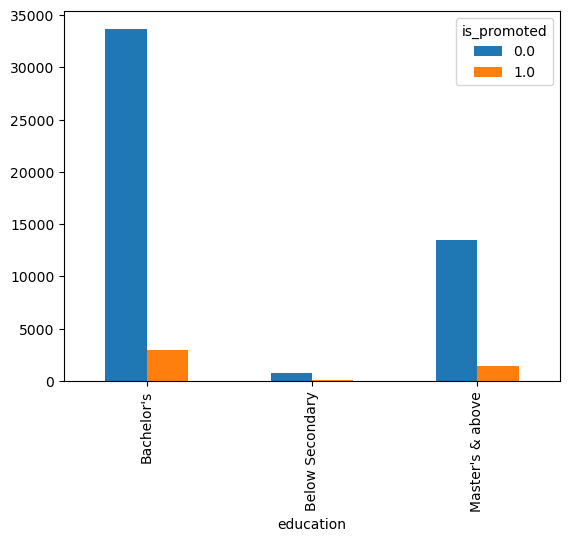

In [ ]:
pd.crosstab(df_concat["education"],df_concat["is_promoted"]).plot(kind="bar")

In [ ]:
for x in ["Master's & above", "Bachelor's",'Below Secondary']:
    print("Percentage of people promoted in the departmnet ",x," ",(len(df_concat.loc[(df_concat.education==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted in the departmnet  Master's & above   1.8787197629569083
Percentage of people promoted in the departmnet  Bachelor's   3.8417328667398913
Percentage of people promoted in the departmnet  Below Secondary   0.08557051265677285


In [ ]:
#Number of people that are more promoted belongs to bachlers degree

In [ ]:
for x in df_concat["region"].unique():
    print("Percentage of people promoted according to degree ",x," ",(len(df_concat.loc[(df_concat.region==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to degree  region_7   0.6590206646402207
Percentage of people promoted according to degree  region_22   0.9374441237324069
Percentage of people promoted according to degree  region_19   0.0676901070269994
Percentage of people promoted according to degree  region_23   0.17497254080563998
Percentage of people promoted according to degree  region_26   0.1826355717898286
Percentage of people promoted according to degree  region_2   1.263122940560423
Percentage of people promoted according to degree  region_20   0.06258141970420701
Percentage of people promoted according to degree  region_34   0.010217374645584816
Percentage of people promoted according to degree  region_1   0.07407596618048992
Percentage of people promoted according to degree  region_4   0.31418427035173313
Percentage of people promoted according to degree  region_29   0.05491838872001839
Percentage of people promoted according to degree  region_31   0.14048890137679124
Percentage of

In [ ]:
#Region_2 have highest number of people promoted


In [ ]:
pd.crosstab(df_concat["gender"],df_concat["is_promoted"])

is_promoted,0.0,1.0
gender,,
f,14845,1467
m,35295,3201


<AxesSubplot:xlabel='gender'>

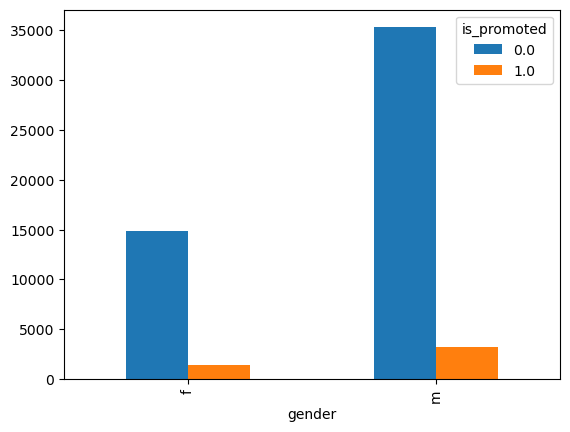

In [ ]:
pd.crosstab(df_concat["gender"],df_concat["is_promoted"]).plot(kind="bar")

In [ ]:
for x in df_concat["gender"].unique():
    print("Percentage of people promoted according to the gender ",x," ",(len(df_concat.loc[(df_concat.gender==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the gender  f   1.8736110756341158
Percentage of people promoted according to the gender  m   4.088227030064625


In [ ]:
#percentage of promoted male employee are more than the female 

In [ ]:

pd.crosstab(df_concat["no_of_trainings"],df_concat["is_promoted"])

is_promoted,0.0,1.0
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [ ]:
for x in df_concat["no_of_trainings"].unique():
    print("Percentage of people promoted according to the number of training they have ",x," ",(len(df_concat.loc[(df_concat.no_of_trainings==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the number of training they have  1   4.99374185802958
Percentage of people promoted according to the number of training they have  2   0.7726889575723518
Percentage of people promoted according to the number of training they have  3   0.15581496334516845
Percentage of people promoted according to the number of training they have  4   0.03320646759815065
Percentage of people promoted according to the number of training they have  7   0.0
Percentage of people promoted according to the number of training they have  5   0.0038315154920943065
Percentage of people promoted according to the number of training they have  6   0.002554343661396204
Percentage of people promoted according to the number of training they have  8   0.0
Percentage of people promoted according to the number of training they have  10   0.0
Percentage of people promoted according to the number of training they have  9   0.0


In [ ]:
# training more doesnt gave promotion


In [ ]:
pd.crosstab(df_concat["age"],df_concat["is_promoted"])

is_promoted,0.0,1.0
age,,
20,109,4
21,93,5
22,213,18
23,394,34
24,775,70
25,1230,69
26,1897,163
27,2566,261
28,2839,308


In [ ]:
l=sorted(df_concat["age"].unique())
for x in l:
    print("Percentage of people promoted according to the age factor ",x," ",(len(df_concat.loc[(df_concat.age==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the age factor  20   0.005108687322792408
Percentage of people promoted according to the age factor  21   0.006385859153490511
Percentage of people promoted according to the age factor  22   0.022989092952565838
Percentage of people promoted according to the age factor  23   0.04342384224373547
Percentage of people promoted according to the age factor  24   0.08940202814886715
Percentage of people promoted according to the age factor  25   0.08812485631816905
Percentage of people promoted according to the age factor  26   0.20817900840379064
Percentage of people promoted according to the age factor  27   0.33334184781220466
Percentage of people promoted according to the age factor  28   0.39336892385501543
Percentage of people promoted according to the age factor  29   0.375488518225242
Percentage of people promoted according to the age factor  30   0.41380367314618505
Percentage of people promoted according to the age factor  31   0.395923267

In [ ]:
#middle age people are more likely to be promoted

In [ ]:
pd.crosstab(df_concat["previous_year_rating"],df_concat["is_promoted"])

is_promoted,0.0,1.0
previous_year_rating,,
1.0,6135,88
2.0,4044,181
3.0,17263,1355
4.0,9093,784
5.0,9820,1921


In [ ]:
l=[1.0,2.0,3.0,4.0,5.0]
for x in l:
    print("Percentage of people promoted according to the previous_work_rating  ",x," ",(len(df_concat.loc[(df_concat.previous_year_rating==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the previous_work_rating   1.0   0.112391121101433
Percentage of people promoted according to the previous_work_rating   2.0   0.23116810135635646
Percentage of people promoted according to the previous_work_rating   3.0   1.7305678305959284
Percentage of people promoted according to the previous_work_rating   4.0   1.0013027152673122
Percentage of people promoted according to the previous_work_rating   5.0   2.453447086771054


In [ ]:
# people with 5 start rating have more chance of promotions 

In [ ]:
pd.crosstab(df_concat["length_of_service"],df_concat["is_promoted"])

is_promoted,0.0,1.0
length_of_service,,
1,4170,377
2,6089,595
3,6424,609
4,6238,598
5,5357,475
6,4333,401
7,5087,464
8,2614,269
9,2400,229


In [ ]:
for x in np.arange(1,38):
    try:
        print("Percentage of people promoted in the length_of_service ",x," ",(len(df_concat.loc[(df_concat.length_of_service==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat))
    
    except:
        continue

Percentage of people promoted in the length_of_service  1   0.004814937801731845
Percentage of people promoted in the length_of_service  2   0.007599172392653708
Percentage of people promoted in the length_of_service  3   0.007777976448951442
Percentage of people promoted in the length_of_service  4   0.007637487547574651
Percentage of people promoted in the length_of_service  5   0.006066566195815985
Percentage of people promoted in the length_of_service  6   0.00512145904109939
Percentage of people promoted in the length_of_service  7   0.005926077294439194
Percentage of people promoted in the length_of_service  8   0.003435592224577895
Percentage of people promoted in the length_of_service  9   0.002924723492298654
Percentage of people promoted in the length_of_service  10   0.0026054305346241285
Percentage of people promoted in the length_of_service  11   0.0012260849574701781
Percentage of people promoted in the length_of_service  12   0.0008046182533398043
Percentage of people pr

In [ ]:
# lesser the length of service higher the chances for promotion

In [ ]:
pd.crosstab(df_concat["KPIs_met >80%"],df_concat["is_promoted"])

is_promoted,0.0,1.0
KPIs_met >80%,,
0,34111,1406
1,16029,3262


<AxesSubplot:xlabel='KPIs_met >80%'>

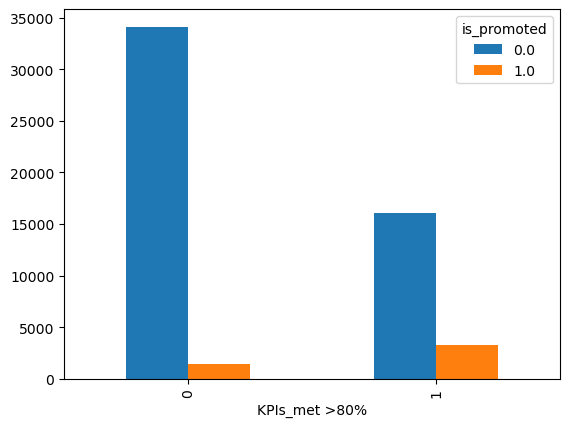

In [ ]:
pd.crosstab(df_concat["KPIs_met >80%"],df_concat["is_promoted"]).plot(kind="bar")

In [ ]:
for x in df_concat["KPIs_met >80%"].unique():
    print("Percentage of people promoted according to the criteria that they have kpi score more than 80% ",x," ",(len(df_concat.loc[(df_concat["KPIs_met >80%"]==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the criteria that they have kpi score more than 80%  1   4.1661345117372095
Percentage of people promoted according to the criteria that they have kpi score more than 80%  0   1.7957035939615316


In [ ]:
#So chnaces of promotion becomes more after KPI score is met

In [ ]:
pd.crosstab(df_concat["awards_won?"],df_concat["is_promoted"])

is_promoted,0.0,1.0
awards_won?,,
0,49429,4109
1,711,559


In [ ]:
for x in df_concat["awards_won?"].unique():
    print("Percentage of people promoted according to if award is one or not ",x," ",(len(df_concat.loc[(df_concat["awards_won?"]==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ])/len(df_concat.loc[df_concat["awards_won?"]==x]))*100)

Percentage of people promoted according to if award is one or not  0   5.371733361222596
Percentage of people promoted according to if award is one or not  1   30.969529085872576


In [ ]:
# promotion chance increases when you have won a award

In [ ]:
pd.crosstab(df_concat["avg_training_score"],df_concat["is_promoted"])

is_promoted,0.0,1.0
avg_training_score,,
39,2,0
40,5,0
41,25,1
42,60,2
43,169,7
...,...,...
95,0,45
96,1,47
97,0,49


In [ ]:
for x in np.arange(39,100):
    try:
        print("Percentage of people promoted according to avg_training_score ",x," ",(len(df_concat.loc[(df_concat["avg_training_score"]==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/(len(df_concat))*100)
    
    except:
        continue

Percentage of people promoted according to avg_training_score  39   0.0
Percentage of people promoted according to avg_training_score  40   0.0
Percentage of people promoted according to avg_training_score  41   0.001277171830698102
Percentage of people promoted according to avg_training_score  42   0.002554343661396204
Percentage of people promoted according to avg_training_score  43   0.008940202814886715
Percentage of people promoted according to avg_training_score  44   0.012771718306981022
Percentage of people promoted according to avg_training_score  45   0.03959232675164116
Percentage of people promoted according to avg_training_score  46   0.045978185905131676
Percentage of people promoted according to avg_training_score  47   0.10089657462515006
Percentage of people promoted according to avg_training_score  48   0.1226084957470178
Percentage of people promoted according to avg_training_score  49   0.12771718306981023
Percentage of people promoted according to avg_training_scor

In [ ]:
#Things to do in future eng. -
#1- binning regions according to the percentage of promotions
#2- mapping no-of training (10-1,9-2,8-3,...)
#3 - mapping length_of_service
#4 - filling null value of previous year work with help of department,lengthofservice (and age)
#5 - filling null values of education with help of age
#6 - binning department 
#7- mapping recruitment channel giving priority to reffered

# Dealing with missing values

In [ ]:
df_concat.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


Dealing null values of education with help of gender and age

In [ ]:
ed_age=df_concat.groupby(["gender","age","education"]).size().reset_index()

In [ ]:
f = ed_age.loc[ed_age.gender=="f"]

In [ ]:
m = ed_age.loc[ed_age.gender=="m"]

In [ ]:
f.iloc[1:15]
# till 23 age female are more below secondary 

,gender,age,education,0
1,f,20,Below Secondary,20
2,f,20,Master's & above,6
3,f,21,Below Secondary,30
4,f,22,Bachelor's,24
5,f,22,Below Secondary,51
6,f,23,Bachelor's,60
7,f,23,Below Secondary,78
8,f,24,Bachelor's,201
9,f,24,Below Secondary,113
10,f,25,Bachelor's,415


In [ ]:
f.iloc[8:38]
# 24-37 age female are more bachelors

,gender,age,education,0
8,f,24,Bachelor's,201
9,f,24,Below Secondary,113
10,f,25,Bachelor's,415
11,f,25,Below Secondary,71
12,f,26,Bachelor's,742
13,f,26,Below Secondary,45
14,f,26,Master's & above,2
15,f,27,Bachelor's,1078
16,f,27,Below Secondary,7
17,f,27,Master's & above,2


In [ ]:
f.iloc[38:]
#after 37 there are more masters 

,gender,age,education,0
38,f,38,Bachelor's,407
39,f,38,Master's & above,412
40,f,39,Bachelor's,357
41,f,39,Master's & above,363
42,f,40,Bachelor's,291
43,f,40,Master's & above,317
44,f,41,Bachelor's,205
45,f,41,Master's & above,297
46,f,42,Bachelor's,210
47,f,42,Master's & above,236


In [ ]:
m.iloc[0:]
# till 41 bachelors are more 
# after 42 going with master

,gender,age,education,0
84,m,20,Bachelor's,66
85,m,20,Below Secondary,28
86,m,20,Master's & above,8
87,m,21,Bachelor's,6
88,m,21,Below Secondary,40
...,...,...,...,...
168,m,58,Master's & above,114
169,m,59,Bachelor's,73
170,m,59,Master's & above,86
171,m,60,Bachelor's,85


In [ ]:
df_concat.loc[(df_concat.gender=="f") & (df_concat.age.isin([20,21,22,23])) & (df_concat.education.isnull()),"education"] = "Below Secondary"
df_concat.loc[(df_concat.gender=="f") & (df_concat.age.isin(np.arange(24,38)))  & (df_concat.education.isnull()),"education"] = "Bachelor's"
df_concat.loc[(df_concat.gender=="f") & (df_concat.age.isin(np.arange(38,61))) & (df_concat.education.isnull()),"education"] = "Master's & above"
df_concat.loc[(df_concat.gender=="m") & (df_concat.age.isin(np.arange(20,42))) & (df_concat.education.isnull()),"education"] = "Bachelor's"
df_concat.loc[(df_concat.gender=="m") & (df_concat.age.isin(np.arange(42,61))) & (df_concat.education.isnull()),"education"] = "Master's & above"


Dealing null values of previous_year rating 

In [ ]:
len(df_concat[df_concat["previous_year_rating"].isnull()])

5936

In [ ]:
df_concat[df_concat["previous_year_rating"].isnull()]["length_of_service"]

10       1
23       1
29       1
56       1
58       1
        ..
23406    1
23436    1
23445    1
23479    1
23488    1
Name: length_of_service, Length: 5936, dtype: int64

In [ ]:
pyr=df_concat[(df_concat["previous_year_rating"].notnull()) & (df_concat["length_of_service"]==37)]

In [ ]:
# conatins null values where length of service == 37

In [ ]:
pyr.groupby(["gender","department"])["previous_year_rating"].median()

gender  department       
m       Sales & Marketing    5.0
Name: previous_year_rating, dtype: float64

In [ ]:
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Analytics") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Finance") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="HR") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Legal") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=5.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Operations") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Procurement") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="R&D") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Sales & Marketing") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Technology") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0

In [ ]:
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Analytics") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Finance") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="HR") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Legal") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Operations") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Procurement") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="R&D") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Sales & Marketing") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Technology") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0

Binning regions into three category according to the insieght we get in eda 

In [ ]:
region = pd.DataFrame({"region":np.arange(1,35),"% of promotion":np.arange(1,35)})

In [ ]:
i=0
for x in df_concat["region"].unique():
    region.iloc[i,0]=x
    region.iloc[i,1]=len(df_concat.loc[(df_concat.region==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ])/len(df_concat)*100
    i+=1

In [ ]:
region.sort_values(by="% of promotion",ascending=False,inplace=True)

In [ ]:
region

,region,% of promotion
5,region_2,1.263123
1,region_22,0.937444
0,region_7,0.659021
9,region_4,0.314184
18,region_13,0.293750
12,region_15,0.283532
16,region_28,0.196684
4,region_26,0.182636
3,region_23,0.174973
22,region_27,0.167310


In [ ]:
df_concat["region"]=df_concat["region"].map({'region_2':3,
 'region_22':3,
 'region_7':3,
 'region_4':3,
 'region_13':3,
 'region_15':3,
 'region_28':3,
 'region_26':3,
 'region_23':3,
 'region_27':3,
 'region_31':3,
 'region_17':3,
 'region_25':3,
 'region_16':3,
 'region_11':2,
 'region_14':2,
 'region_30':2,
 'region_1':2,
 'region_19':2,
 'region_8':2,
 'region_10':2,
 'region_20':2,
 'region_29':2,
 'region_32':2,
 'region_3':2,
 'region_5':2,
 'region_12':2,
 'region_6':2,
 'region_21':1,
 'region_24':1,
 'region_33':1,
 'region_34':1,
 'region_9':1,
 'region_18':1})
#28-36
#29-16

mapping no_of_trainings for better result

In [ ]:
df_concat["no_of_trainings"]=df_concat["no_of_trainings"].map({10:1,9:2,8:3,7:4,6:5,5:6,4:7,3:8,2:9,1:10})

In [ ]:
# making bins to length of service according to promotion column
def service_length(l):
    if l in np.arange(1,11):
        return 4
    elif l in np.arange(11,21):
        return 3
    elif l in np.arange(21,31):
        return 2
    else:
        return 1
df_concat["length_of_service"]=df_concat["length_of_service"].apply(service_length)

In [ ]:
df_concat["gender"] = df_concat["gender"].map({"m":0,"f":1})
# as female have more chance of promotion

In [ ]:
df_concat.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# Data Preprocessing

droping unwanted features


In [ ]:
df_concat["education"] = df_concat["education"].map({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [ ]:
df_concat.drop(["employee_id"],axis=1,inplace=True)

In [ ]:
df_train_cleaned = df_concat.iloc[0:54808]
df_test_cleaned = df_concat.iloc[54808:].drop("is_promoted",axis=1)

<AxesSubplot:>

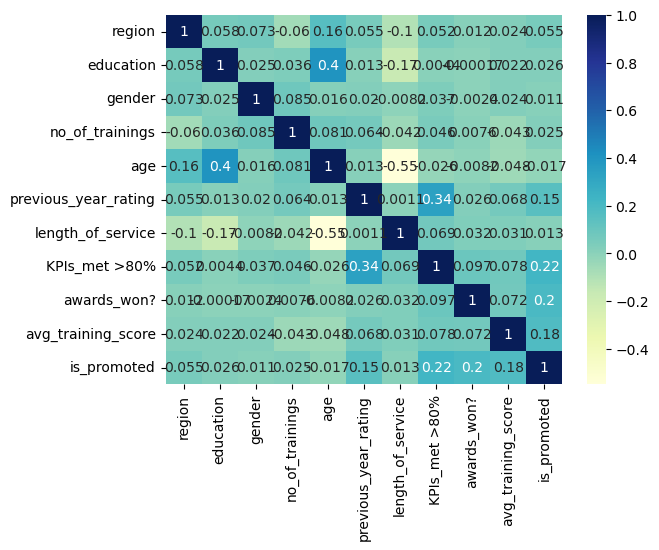

In [ ]:
sns.heatmap(df_train_cleaned.corr(),annot=True,cmap="YlGnBu")

data scaling

In [ ]:
df_train_cleaned.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,3,3,1,sourcing,10,35,5.0,4,1,0,49,0.0
1,Operations,3,2,0,other,10,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,2,2,0,sourcing,10,34,3.0,4,0,0,50,0.0
3,Sales & Marketing,3,2,0,other,9,39,1.0,4,0,0,50,0.0
4,Technology,3,2,0,other,10,45,3.0,4,0,0,73,0.0


In [ ]:
df_train_cleaned[["age","avg_training_score"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train_cleaned[["age","avg_training_score"]])

StandardScaler()

In [ ]:
df_train_cleaned[["age","avg_training_score"]] = scaler.transform(df_train_cleaned[["age","avg_training_score"]])
df_test_cleaned[["age","avg_training_score"]] =scaler.transform(df_test_cleaned[["age","avg_training_score"]] )

changing dtype of target column to int

In [ ]:
df_train_cleaned["previous_year_rating"]=df_train_cleaned["previous_year_rating"].astype(int)
df_test_cleaned["previous_year_rating"] = df_test_cleaned["previous_year_rating"].astype(int)
df_train_cleaned["is_promoted"] = df_train_cleaned["is_promoted"].astype(int)

In [ ]:
df_train_scaled = pd.get_dummies(df_train_cleaned,drop_first=True)
df_test_scaled = pd.get_dummies(df_test_cleaned,drop_first=True)

In [ ]:
df_train_scaled.head()

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,3,3,1,10,0.025598,5,4,1,0,-1.075931,...,0,0,0,0,0,0,1,0,0,1
1,3,2,0,10,-0.627135,5,4,0,0,-0.253282,...,0,0,0,1,0,0,0,0,0,0
2,2,2,0,10,-0.104948,3,4,0,0,-1.001145,...,0,0,0,0,0,0,1,0,0,1
3,3,2,0,9,0.547785,1,4,0,0,-1.001145,...,0,0,0,0,0,0,1,0,0,0
4,3,2,0,10,1.331064,3,4,0,0,0.718939,...,0,0,0,0,0,0,0,1,0,0


# Model Building

In [ ]:
#F1-Score = (2 x Precision x Recall) / (Precision + Recall)

Logistic Regreassion

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

LogisticRegression()

In [ ]:
pred_y_lr = lr.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_lr)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("Logistic_Regression.csv",index=False)

In [ ]:
# f1 final score 0.3650

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()
kn.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

KNeighborsClassifier()

In [ ]:
pred_y_kn = kn.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_kn)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("KNN.csv",index=False)

In [ ]:
# f1 final score 0.2738

Support Vector Machine SVM

In [ ]:
from sklearn.svm import SVC
sm= SVC()
sm.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

SVC()

In [ ]:
pred_y_sm = sm.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_sm)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("SVM.csv",index=False)

In [ ]:
# f1 final score  0.1818

Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

GaussianNB()

In [ ]:
pred_y_nb = nb.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_nb)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("NaiveGauss.csv",index=False)

In [ ]:
# f1 final score 0.2479

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

DecisionTreeClassifier()

In [ ]:
pred_y_dt = dt.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_dt)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("DecisionTree.csv",index=False)

In [ ]:
# f1 final score 0.4358

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

RandomForestClassifier()

In [ ]:
pred_y_rf = rf.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_rf)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("RandomForest.csv",index=False)

In [ ]:
# f1 final score 0.4543

In [131]:
!pip install xgboost

XGB Boost

In [132]:
from xgboost import XGBClassifier 
gb = XGBClassifier()
gb.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
pred_y_gb = gb.predict(df_test_scaled)

In [ ]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_gb)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("XGBoost.csv",index=False)

In [ ]:
# f1 final score 0.4797

In [ ]:
# our base model was logistic regression and its f1 score was 0.365 and our final model was xgboost, it has the best f1 score of 0.4797

# Library Install

In [ ]:
!pip install sklearn

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install LibSVM

In [ ]:
!pip install naive-bayes